# Project Psyched: A Closer Look Into Reproducibility In Psychological Research

## Data Analysis & Visualization Script: Part 1 - P-value Trends
This script for data analysis and visualization after data has been scraped from TDM Studio.

Author: Yuyang Zhong (2020). This work is licensed under a [Creative Commons BY-NC-SA 4.0 International
License][cc-by].

![CC BY-NC-SA 4.0][cc-by-shield]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-shield]: https://img.shields.io/badge/license-CC--BY--NC--SA%204.0-blue

#### Setup & Imports

In [1]:
import json
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats


# sns.set_palette(sns.color_palette("Greys_r"))

In [2]:
in_path = "../data/"
in_name = 'corpus1_metadata_pval.csv'

In [3]:
df = pd.read_csv(in_path + in_name)

#### Only include JPSP data

In [4]:
df['Journal'].value_counts()

Journal of Personality and Social Psychology    6048
Journal of Experimental Social Psychology          1
Name: Journal, dtype: int64

In [5]:
df = df[df['Journal'] == 'Journal of Personality and Social Psychology']

#### Total number of articles & variables

In [6]:
df.shape

(6048, 15)

#### The number of articles with p-values captured

We will exclude articles without P-values from analysis.

In [7]:
df['P-Values'] = df['P-Values'].apply(eval)
df['Count'] = df['P-Values'].apply(len)
df = df[df['Count'] > 0]
df.shape

(5627, 16)

#### P-Value Clean Up

In [8]:
p_vals = list(itertools.chain(*list(df['P-Values'])))
len(p_vals)

192896

In [9]:
pval_df = pd.DataFrame(data={'raw': p_vals})

In [10]:
pval_df['dir'] = pval_df['raw'].apply(lambda x: re.findall(r'[\<|\>|\=]', x)[0])
pval_df['p'] = pval_df['raw'].apply(lambda x: re.findall(r'\d?\.\d+', x)[0])

#### Total Valid P-Values

In [13]:
p_vals_clean = [float(i) for i in list(pval_df['p']) if float(i) <= 1.00]
len(p_vals_clean)

192719

#### Total P-Values included for visualization & analysis

In [14]:
p_vals_clean_10 = [float(i) for i in list(pval_df['p']) if float(i) <= 0.10]
len(p_vals_clean_10)

168169

In [18]:
p_vals_clean_10_leq = [float(i) for i in list(pval_df[(pval_df['dir'] == '<') | (pval_df['dir'] == '=']['p']) if float(i) <= 0.10]
len(p_vals_clean_10_leq)

165952

#### Looking at only equal or less than

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


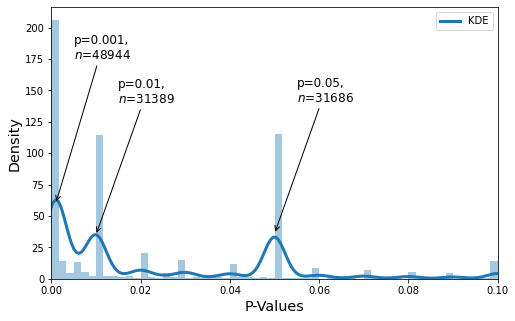

In [20]:
plt.figure(figsize=(8,5))
plt.xlim(0, 0.10)

ax = sns.distplot(p_vals_clean_10_leq, hist = True, bins = 60, norm_hist=False,
            kde_kws={"lw": 3, "label": "KDE"})

# Annotations
ax.annotate(f'p=0.001,\n$n$={p_vals_clean_10_leq.count(0.001)}',
            xy=(0.001, 60), xytext=(0.005, 175),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

ax.annotate(f'p=0.01,\n$n$={p_vals_clean_10_leq.count(0.01)}', 
            xy=(0.01, 35), xytext=(0.015, 140),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

ax.annotate(f'p=0.05,\n$n$={p_vals_clean_10_leq.count(0.05)}', 
            xy=(0.05, 36), xytext=(0.055, 141),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

# plt.title("Distribution & Kernal Density Estimation for P-Values (All Years)")
ax.set_xlabel("P-Values", fontsize = 'x-large')
ax.set_ylabel("Density", fontsize = 'x-large')
plt.legend();

In [19]:
p_vals_clean_10_leq

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.01,
 0.05,
 0.01,
 0.05,
 0.01,
 1e-05,
 0.0003,
 0.0005,
 0.049,
 0.005,
 0.007,
 0.001,
 0.0001,
 0.0014,
 0.0001,
 0.0009,
 0.0003,
 0.04,
 0.0003,
 0.0021,
 0.019,
 1e-05,
 0.049,
 0.004,
 0.06,
 0.004,
 0.016,
 0.0001,
 1e-05,
 1e-05,
 0.001,
 0.001,
 0.0001,
 0.0006,
 0.038,
 0.0004,
 1e-05,
 0.1,
 1e-05,
 0.032,
 0.0001,
 1e-05,
 0.001,
 0.033,
 0.013,
 0.03,
 0.019,
 0.04,
 0.028,
 0.06,
 0.08,
 0.016,
 0.017,
 0.048,
 0.036,
 0.05,
 0.0001,
 0.07,
 0.07,
 0.03,
 0.05,
 0.001,
 0.001,
 0.001,
 0.001,
 0.01,
 0.001,
 0.05,
 0.01,
 0.001,
 0.1,
 0.05,
 0.01,
 0.001,
 0.05,
 0.001,
 0.1,
 0.05,
 0.001,
 0.05,
 0.01,
 0.001,
 0.01,
 0.05,
 0.01,
 0.001,
 0.0048,
 0.001,
 0.001,
 0.025,
 0.001,
 0.001,
 0.001,
 0.001,
 0.05,
 0.001,
 0.001,
 0.02,
 0.001,
 0.02,
 0.04,
 0.001,
 0.01,
 0.0001,
 0.0001,
 0.1,
 0.051,
 0.02,
 0.001,
 0.01,
 0.02,
 0.02,
 0.01,
 0.001,
 0.001,
 0.001,
 0.001,
 

#### Year Published

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


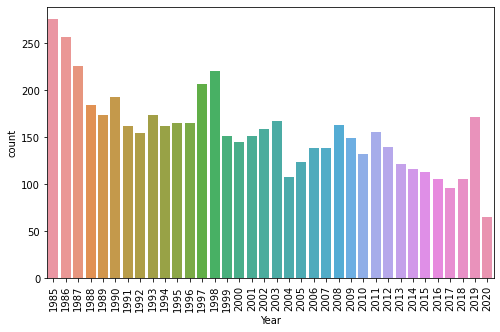

In [21]:
df['Year'] = pd.to_datetime(df['Date Published']).dt.year

plt.figure(figsize=(8,5))
ax = sns.countplot(df['Year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Proportion of p-values of interest
#### Grouping by 5-year periods

In [22]:
df_year = df.groupby('Year')['P-Values'].sum().to_frame()

In [23]:
def year_group(y):
    y = int(y)
    if y <= 1990:
        return '1985-1990'
    if y <= 1995:
        return '1991-1995'
    if y <= 2000:
        return '1996-2000'
    if y <= 2005:
        return '2001-2005'
    if y <= 2010:
        return '2006-2010'
    if y <= 2015:
        return '2011-2015'
    else:
        return '2016-2020'
    
df_year['Year Group'] = [year_group(i) for i in df_year.index]
df_year_group = df_year.groupby('Year Group')['P-Values'].sum().to_frame()

In [24]:
def prop_001(lst):
    return (lst.count('0.001') + lst.count('.001')) / len(lst)

def prop_01(lst):
    return (lst.count('0.01') + lst.count('.01')) / len(lst)

def prop_05(lst):
    return (lst.count('0.05') + lst.count('.05')) / len(lst)

df_year_group['0.001'] = df_year_group['P-Values'].apply(prop_001)
df_year_group['0.01'] = df_year_group['P-Values'].apply(prop_01)
df_year_group['0.05'] = df_year_group['P-Values'].apply(prop_05)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


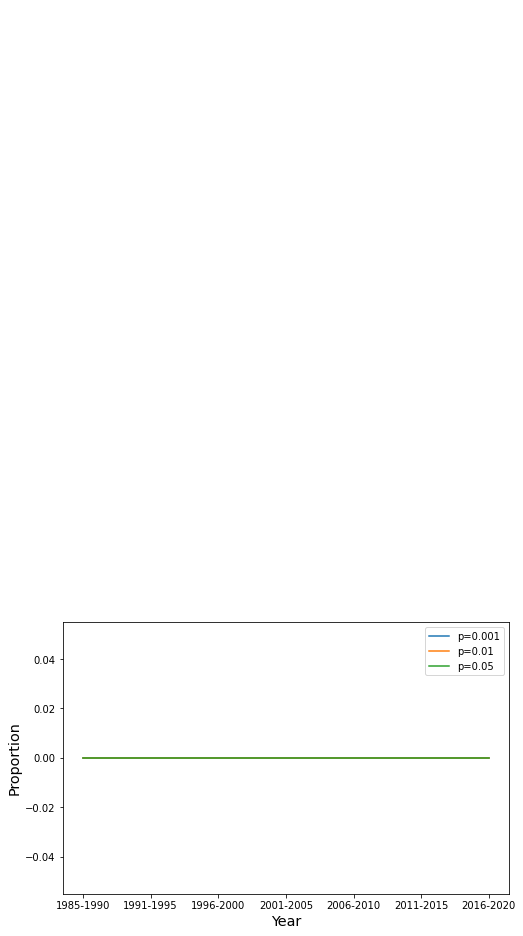

In [25]:
plt.figure(figsize=(8,5))

for p in ['0.001', '0.01', '0.05']:
    ax=sns.lineplot(df_year_group.index, df_year_group[p], label=f'p={p}')
    
# Annotations
ax.annotate('Point of Inflection',
            xy=(3, 0.23), xytext=(2.3, 0.3),
            arrowprops=dict(arrowstyle="->"),
            fontsize='large')

ax.set_xlabel("Year", fontsize = 'x-large')
ax.set_ylabel("Proportion", fontsize = 'x-large');
plt.legend();

#### Grouping before and after 2015

In [18]:
def year_group_before_after(y):
    y = int(y)
    if y <= 2015:
        return '1985-2015'
    else:
        return '2016-2020'
    
df_year['Year Group 2'] = [year_group_before_after(i) for i in df_year.index]
df_year_group_ba = df_year.groupby('Year Group 2')['P-Values'].sum().to_frame()

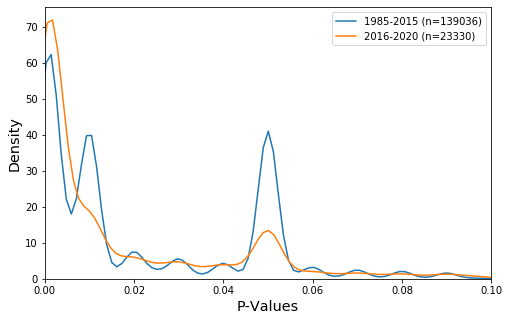

In [19]:
plt.figure(figsize=(8,5))
plt.xlim(0, 0.10)
for i in df_year_group_ba.index:
    vals = df_year_group_ba.loc[i][0]
    vals = [float(y) for y in vals if float(y) < 0.10]
    ax = sns.distplot(vals, hist = False, bins = 60, label = f'{i} (n={len(vals)})')

# plt.title("Distribution & Kernal Density Estimation for P-Values (All Years)")
ax.set_xlabel("P-Values", fontsize = 'x-large')
ax.set_ylabel("Density", fontsize = 'x-large')
plt.legend();

## Proportion of Significant p-values in an article, over time

In [20]:
def prog_sig(lst):
    if len(lst) == 0:
        return 0
    return sum(np.array(lst).astype('float64') <= 0.05) / len(lst)

df['Prop Sig'] = df['P-Values'].apply(prog_sig)

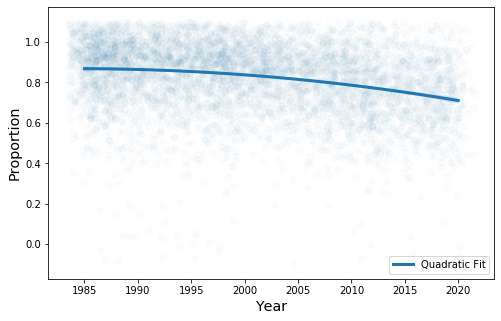

In [36]:
plt.figure(figsize=(8,5))
ax=sns.regplot(x='Year', y='Prop Sig', data=df, order=2, 
               x_jitter=1.5,
               y_jitter=0.1,
               scatter_kws={'alpha': 0.02},
               line_kws={"lw": 3, 'label':'Quadratic Fit'})

ax.set_xlabel("Year", fontsize = 'x-large')
ax.set_ylabel("Proportion", fontsize = 'x-large')
plt.legend();

### Proportion of articles with majority non-significant p-values (>50% non-significant)

In [22]:
df['Major Non-Sig'] = df['Prop Sig'] <= 0.5
df_nonsig = df.groupby('Year').sum().drop('Prop Sig', axis=1)
df_nonsig['Prop Non-Sig'] = df_nonsig['Major Non-Sig'] / df_nonsig['Count']

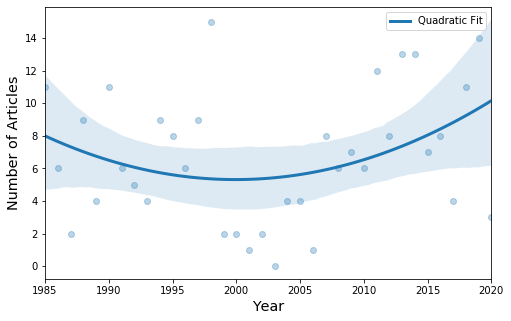

In [23]:
plt.figure(figsize=(8,5))
ax=sns.regplot(x=df_nonsig.index, y='Major Non-Sig', data=df_nonsig, order=2,
               scatter_kws={'alpha': 0.3},
               line_kws={"lw": 3, 'label':'Quadratic Fit'})

ax.set_xlabel("Year", fontsize = 'x-large')
ax.set_ylabel("Number of Articles", fontsize = 'x-large')
plt.legend();